<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Hopfield_Covariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hopfield Network & Covariance Matrix Explanation**

## **1. Given Vectors**
Given this two vectors in $\mathbb{R}^3$

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -1 \\ 0.5 \\ 0.5 \end{bmatrix}
$$

We can create a transformation from $\mathbb{R}^2$ to $\mathbb{R}^3$ in this using the matriz $A=[v_1\ \ v_2]$:

$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$


Also is it possible to create a transformation from $\mathbb{R}^3$ to $\mathbb{R}^2$ using $A^T$


$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$




But here we are going to study the composition of both $A^TA$ and $AA^T$.





## **2. Hopfield Network: $ A A^T $**
**More dimensions than vectors**

In a Hopfield Network, the **weight matrix** is computed as:

$$
W = A A^T
$$

In our example it is a  transformation from $\mathbb{R}^3$ to $\mathbb{R}^3$.




$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$



$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$





The weights $W$ allows to recover the patterns of possitive (+1) and negative (-1) values, where each column of $A$ is one pattern.

The first column is

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix},
$$

So it has the pattern of positives an negatives

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$

if we add noice, for example to the second row, it sign change.

$$
\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix},
$$

Now we use $W$ to restore the pattern


$$
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}=\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix}
=\begin{bmatrix}0.75\\0.75\\-1.5\end{bmatrix}
$$


So the answer recover the pattern

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$


## **3. Covariance Matrix: \( A^T A \)**
**More vectors than dimensions**

In statistics, the **covariance matrix** is:

$$
C = A^T A
$$

In our example it is a transformation from $\mathbb{R}^2$ to $\mathbb{R}^2$.


$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$

$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}1.5 & -0.75\\-0.75 & 1.5\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$



This **captures feature relationships**—the diagonal values show **variance**, while the off-diagonal values show **covariances between features**.

---

## **4. Summary**
- **\( A A^T \) (Hopfield Network)**: Stores similarity between patterns.
- **\( A^T A \) (Covariance Matrix)**: Measures how features relate to each other.

This helps explain **memory retrieval in neural networks** and **data relationships in statistics**!



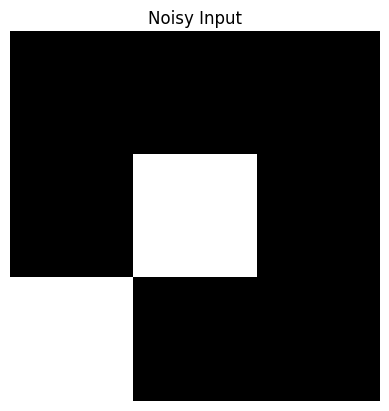

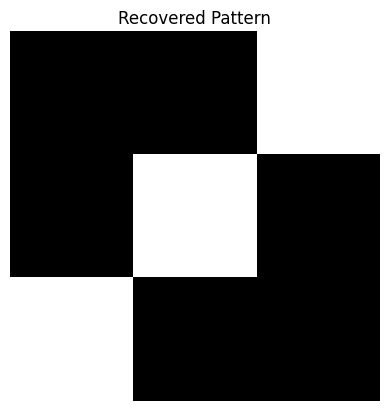

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sign(x):
    return np.where(x >= 0, 1, -1)

def train_hopfield(patterns):
    N = patterns.shape[1]
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)  # No self-connections
    return W / N  # Normalize weights

def recall_hopfield(W, input_pattern, steps=5):
    s = input_pattern.copy()
    for _ in range(steps):
        s = sign(W @ s)  # Update all neurons at once
    return s

def display_pattern(pattern, title="Pattern"):
    size = int(np.sqrt(len(pattern)))
    plt.imshow(pattern.reshape(size, size), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Define 3x3 patterns for '/' and '\'
pattern_slash = np.array([
    -1, -1,  1,
    -1,  1, -1,
     1, -1, -1
])

pattern_backslash = np.array([
     1, -1, -1,
    -1,  1, -1,
    -1, -1,  1
])

# Store patterns in Hopfield Network
patterns = np.array([pattern_slash, pattern_backslash])
W = train_hopfield(patterns)

# Create a noisy input
noisy_input = np.array([
    -1, -1, -1,
    -1,  1, -1,
     1, -1, -1
])

display_pattern(noisy_input, "Noisy Input")

# Recall stored pattern
recovered_pattern = recall_hopfield(W, noisy_input)
display_pattern(recovered_pattern, "Recovered Pattern")

